# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Aspek Learnability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ulasan_aspek_learnability = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_aspek_learnability_starbucks_app.csv")
ulasan_aspek_learnability.shape

(1500, 3)

In [ ]:
ulasan_aspek_learnability['Learnability'].value_counts()

0    1371
1     129
Name: Learnability, dtype: int64

In [ ]:
#detect missing values
ulasan_aspek_learnability.isna().sum()

Ulasan          0
stemming        0
Learnability    0
dtype: int64

# Inisialisasi Data

In [ ]:
x_learnability = ulasan_aspek_learnability['stemming'] #hasil stemming
y_learnability = ulasan_aspek_learnability['Learnability'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_learnability_train, x_learnability_test, y_learnability_train, y_learnability_test = train_test_split(
    ulasan_aspek_learnability['stemming'],
    ulasan_aspek_learnability['Learnability'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_learnability_train
train_df['sentiment'] = y_learnability_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_learnability_test
test_df['sentiment'] = y_learnability_test

# Feature TF-IDF "x_learnability"

In [ ]:
#merubah nilai x_learnability menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_learnability_train)
x_learnability_train_vectorized = tfidf_vect.transform(x_learnability_train)
x_learnability_test_vectorized = tfidf_vect.transform(x_learnability_test)

In [ ]:
print (x_learnability_train_vectorized)

  (0, 1455)	0.44541340896771275
  (0, 942)	0.5522234895286872
  (0, 836)	0.35143289188194377
  (0, 305)	0.40508564830784416
  (0, 178)	0.4572271347623944
  (1, 904)	1.0
  (2, 1388)	1.0
  (3, 1386)	0.7255399922016651
  (3, 1360)	0.6881800053154754
  (4, 1439)	0.5737657417148951
  (4, 836)	0.34245563446800076
  (4, 521)	0.5443219271815385
  (4, 467)	0.5071791119958026
  (7, 1094)	0.8358772432184245
  (7, 836)	0.5489164182911334
  (8, 1455)	0.3513649887701197
  (8, 1312)	0.3013045025045987
  (8, 1078)	0.6129357536190649
  (8, 942)	0.43562226976177204
  (8, 401)	0.30034663973794423
  (8, 178)	0.3606842628368834
  (9, 1581)	0.22675578773928376
  (9, 1515)	0.20159726758591245
  (9, 1455)	0.3480362858373702
  (9, 1450)	0.27512146894159156
  :	:
  (1196, 1275)	0.3672817690958437
  (1196, 836)	0.18960455647036123
  (1196, 829)	0.4192046788454058
  (1196, 759)	0.3672817690958437
  (1196, 748)	0.2379473444388577
  (1196, 270)	0.25541767685209366
  (1196, 97)	0.232441423265161
  (1196, 28)	0.41920

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.9192


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.9192


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.9175


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.917 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.917 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.9192 0.008975274678557525
Accuracy Score poly of : 0.9192 0.0033333333333333604
Accuracy Score rbf of : 0.9208 0.007905694150420967


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Efficiency

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

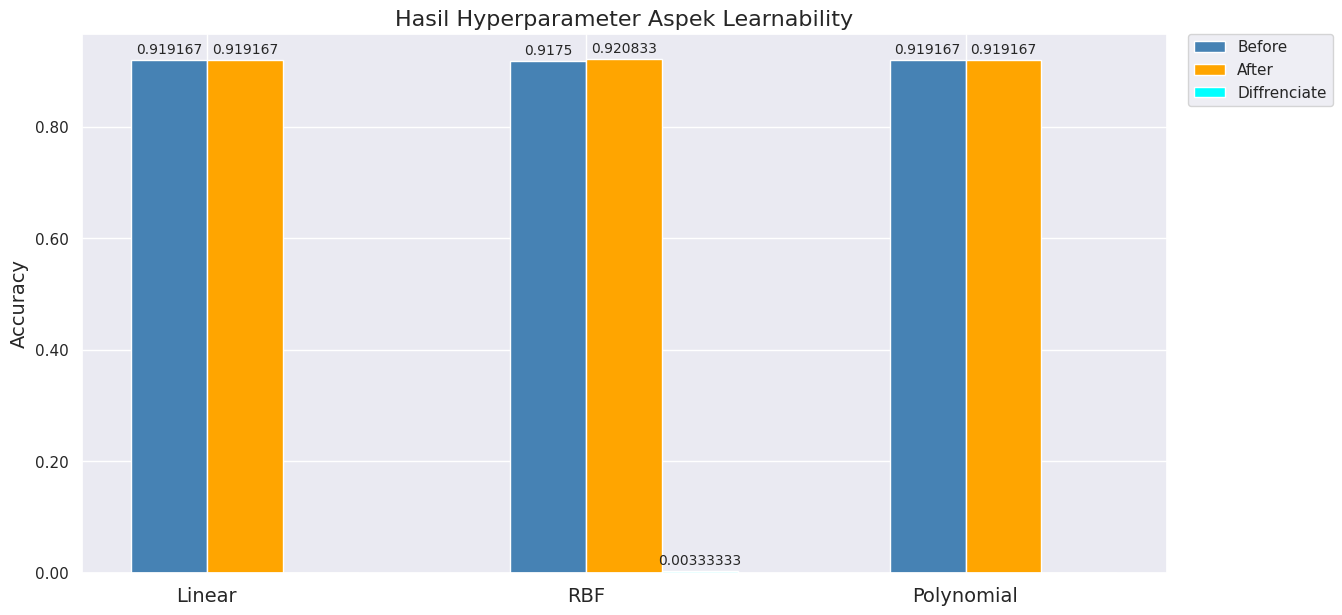

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek Learnability', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  56.00505689001265
ACCURACY  90.33333333333333
PRECISION  70.57823129251702
RECALL 54.6189082580481
Confusion Matrix : 
 [[268   3]
 [ 26   3]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       271
           1       0.50      0.10      0.17        29

    accuracy                           0.90       300
   macro avg       0.71      0.55      0.56       300
weighted avg       0.87      0.90      0.87       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  55.673758865248224
ACCURACY  90.0
PRECISION  66.99171136031204
RECALL 54.43440641302965
Confusion Matrix : 
 [[267   4]
 [ 26   3]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       271
           1       0.43      0.10      0.17        29

    accuracy                           0.90       300
   macro avg       0.67      0.54      0.56       300
weighted avg       0.86      0.90      0.87       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  62.040228631266636
ACCURACY  90.33333333333333
PRECISION  71.00694444444444
RECALL 59.237816516096196
Confusion Matrix : 
 [[265   6]
 [ 23   6]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       271
           1       0.50      0.21      0.29        29

    accuracy                           0.90       300
   macro avg       0.71      0.59      0.62       300
weighted avg       0.88      0.90      0.88       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  69.72133535639671
ACCURACY  93.75
PRECISION  92.08173514721709
RECALL 63.86363636363637
Confusion Matrix : 
 [[1097    3]
 [  72   28]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1100
           1       0.90      0.28      0.43       100

    accuracy                           0.94      1200
   macro avg       0.92      0.64      0.70      1200
weighted avg       0.94      0.94      0.92      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  99.18551851927266
ACCURACY  99.75
PRECISION  98.9644050847305
RECALL 99.4090909090909
Confusion Matrix : 
 [[1098    2]
 [   1   99]]
Report Hasil : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1100
           1       0.98      0.99      0.99       100

    accuracy                           1.00      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       1.00      1.00      1.00      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  94.49050457795573
ACCURACY  98.41666666666666
PRECISION  97.55708399169687
RECALL 91.86363636363637
Confusion Matrix : 
 [[1097    3]
 [  16   84]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1100
           1       0.97      0.84      0.90       100

    accuracy                           0.98      1200
   macro avg       0.98      0.92      0.94      1200
weighted avg       0.98      0.98      0.98      1200

